In [3]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
import seaborn

In [5]:
rama_2019 = pandas.read_csv("rama_2019.csv", index_col=0)

rama_2019.head()

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2019-01-01,0.642419,12.617143,22.363946,35.441905,38.940387,93.458586,63.278607,4.616041
2019-01-02,0.533982,18.812081,29.930827,49.379195,23.565789,63.889813,33.844221,7.147321
2019-01-03,0.715211,33.603041,38.135542,72.822635,24.922164,65.099404,27.566586,4.555878
2019-01-04,0.656344,28.825127,35.659542,65.322581,31.628838,66.979879,30.995074,3.610370
2019-01-05,0.547734,18.575552,32.806354,52.078098,36.803170,69.781676,35.745843,5.655977


## Test de Mann-Kendall

* $H_0$ - No hay tendencia monótona (la serie es aleatoria)
* $H_a$ - Existe una tendencia nónotona (positiva o negativa)

$$
S = \sum_{j = 1}^{n - 1} \sum_{k = j + 1}^n sign(p_k - p_j)
$$

$$
Var(S) = ...
$$

$$
Z = \begin{cases}
\frac{S - 1}{Var(S)} \qquad S > 0 \\
0 \qquad S = 0 \\
\frac{S + 1}{Var(S)} \qquad S < 0 \\
\end{cases}
$$

## Pendiente de Sen



In [7]:
import pymannkendall as kendall

In [14]:
report = kendall.original_test(rama_2019["PM10"], alpha=0.05)

report

Mann_Kendall_Test(trend='decreasing', h=np.True_, p=np.float64(2.922551090023262e-12), z=np.float64(-6.98140300779494), Tau=np.float64(-0.2447990365798585), s=np.float64(-16262.0), var_s=5425116.666666667, slope=np.float64(-0.06042866202595837), intercept=np.float64(50.57548127745682))

In [15]:
pandas.DataFrame({
    "Trend": [report.trend],
    "Ha": [report.h],
    "p-value": [report.p],
    "Z": [report.z],
    "S": [report.s],
    "Var(S)": [report.var_s],
    "b0": [report.intercept],
    "b1": [report.slope],
    "tau": [report.Tau],
}, index=["Value"]).T

,Value
Trend,decreasing
Ha,True
p-value,0.0
Z,-6.981403
S,-16262.0
Var(S),5425116.666667
b0,50.575481
b1,-0.060429
tau,-0.244799


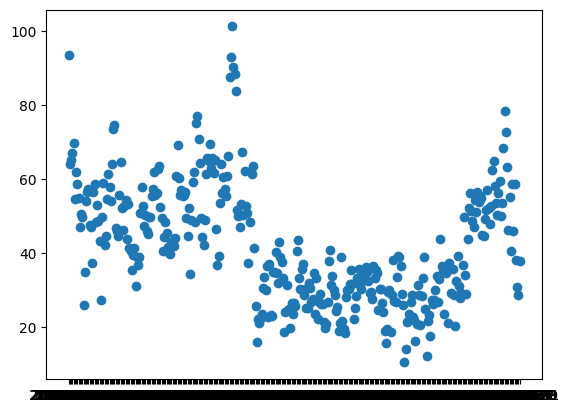

In [ ]:
pyplot.scatter(rama_2019.index, rama_2019["PM10"])
pyplot.plot()

In [56]:
reports = []

for column in rama_2019.columns:
    report = kendall.original_test(rama_2019[column], alpha=0.05)
    if report.h:
        reports.append((column, report))
    print(f"{column}")
    print("-" * 55)
    for field in report._fields:
        i = report._fields.index(field)
        value = report[i]
        print(f"{field:20s}: {value:>30}")
    print("=" * 55, end="\n\n")

CO
-------------------------------------------------------
trend               :                       no trend
h                   :                              0
p                   :             0.5558300530632643
z                   :            -0.5890465413864747
Tau                 :          -0.020668372723167242
s                   :                        -1373.0
var_s               :              5425115.666666667
slope               :          -4.03616065828871e-05
intercept           :             0.3696713937934343

NO
-------------------------------------------------------
trend               :                       no trend
h                   :                              0
p                   :             0.7141993893910006
z                   :           -0.36622205065181007
Tau                 :           -0.01285563751317176
s                   :                         -854.0
var_s               :              5425116.666666667
slope               :         -0.

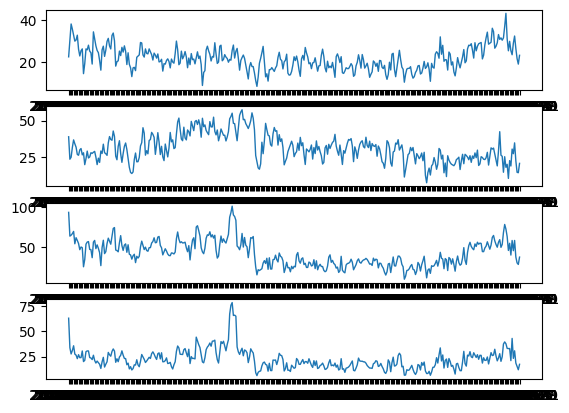

In [62]:
fig, axis = pyplot.subplots(len(reports), 1)

for i, (column, report) in enumerate(reports):
    axis[i].plot(rama_2019[column], lw=1)

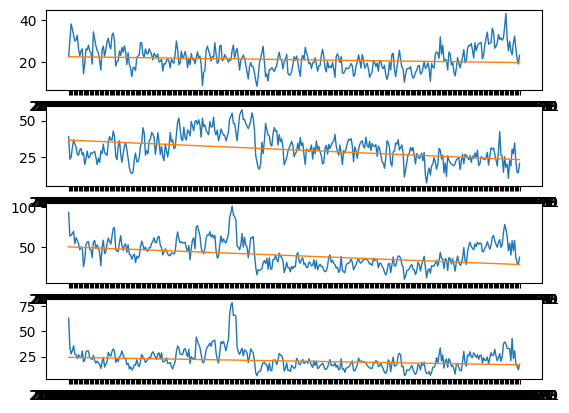

In [65]:
fig, axis = pyplot.subplots(len(reports), 1)

for i, (column, report) in enumerate(reports):
    points = [report.intercept + i * report.slope for i in range(rama_2019[column].count())]
    y = pandas.Series(points, index=rama_2019.index)
    axis[i].plot(rama_2019[column], lw=1)
    axis[i].plot(points, lw=1)

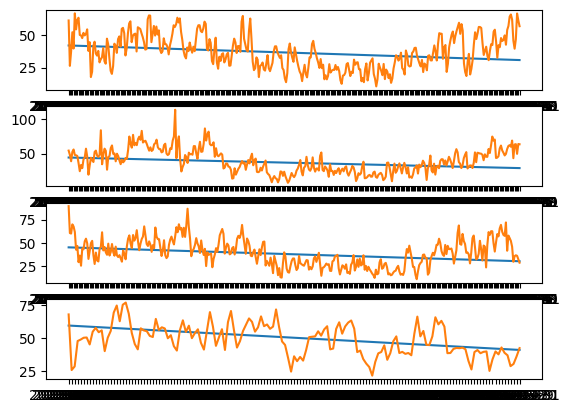

In [72]:
column = "PM10"

plots = []

for anio in range(2020, 2024):
    rama = pandas.read_csv(f"rama_{anio}.csv", index_col=0)
    report = kendall.original_test(rama[column], alpha=0.05)
    points = [report.intercept + i * report.slope for i in range(len(rama))]
    y = pandas.Series(points, index=rama.index)
    plots.append((rama[column], y))

fig, axis = pyplot.subplots(len(plots), 1)

for i, (s, y) in enumerate(plots):
    axis[i].plot(y)
    axis[i].plot(s)

In [85]:
ramas = []
for anio in range(2020, 2024):
    rama = pandas.read_csv(f"rama_{anio}.csv", index_col=0)
    ramas.append(rama)

ramas = pandas.concat(ramas)

ramas

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
fecha,,,,,,,,
2020-01-01,0.428817,9.031579,13.382716,22.637895,18.774803,61.312903,26.716475,2.047619
2020-01-02,0.179193,4.286374,8.154297,12.235566,17.941581,26.385827,5.731481,0.942748
2020-01-03,0.306560,13.092157,21.731023,35.358824,24.060172,37.513944,11.231092,1.107143
2020-01-04,0.350833,11.978131,25.974958,38.288270,25.286115,52.280000,29.207951,7.677885
2020-01-05,0.427045,11.007952,29.782972,40.908549,30.433094,39.737609,21.806647,11.798077
...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588


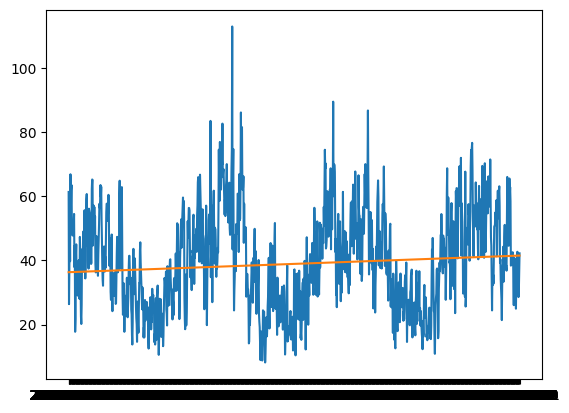

In [88]:
column = "PM10"

report = kendall.original_test(ramas[column], alpha=0.05)
points = [report.intercept + i * report.slope for i in range(len(ramas))]
y = pandas.Series(points, index=ramas.index)

pyplot.plot(ramas[column])
pyplot.plot(y)

## Innovative Trand Analysis (ITA Methodology)

* **Pasado:** $x_1 = $x_0, \ldots, x_{n / 2 - 1}$
* **Presente:** $x_2 = $x_{n / 2}, \ldots, x_{n - 1}$

Sen Z. 2012

In [96]:
x = rama_2019["PM10"]; x

fecha
2019-01-01    93.458586
2019-01-02    63.889813
2019-01-03    65.099404
2019-01-04    66.979879
2019-01-05    69.781676
                ...    
2019-12-27    58.535248
2019-12-28    38.024691
2019-12-29    30.612903
2019-12-30    28.701370
2019-12-31    37.805699
Name: PM10, Length: 365, dtype: float64

In [97]:
n = x.count(); n

np.int64(365)

In [100]:
m = int(n / 2); n

np.int64(365)

In [106]:
x1 = x[:m]
x2 = x[m:2*m]

x1.shape, x2.shape

((182,), (182,))

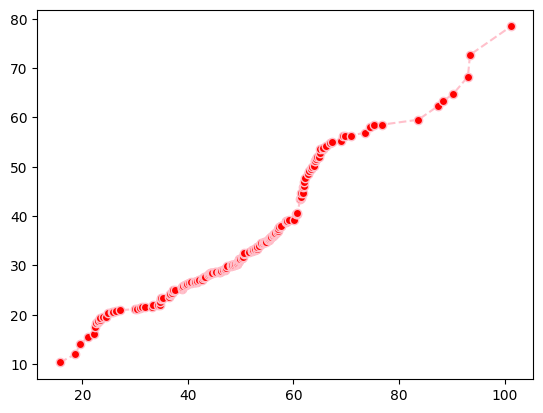

In [ ]:
pyplot.plot(sorted(x1), sorted(x2), 
            marker="o", linestyle="--", 
            color="pink", markerfacecolor="red"
)

Text(0.5, 1.0, 'Comparación entre x1 (pasado) y x2 (presente)')

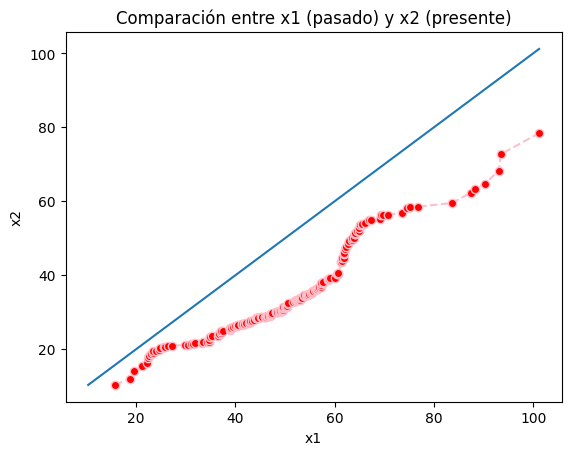

In [122]:
x = numpy.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))

pyplot.plot(x, x)
pyplot.plot(sorted(x1), sorted(x2), 
            marker="o", linestyle="--", 
            color="pink", markerfacecolor="red")
pyplot.xlabel("x1")
pyplot.ylabel("x2")
pyplot.title("Comparación entre x1 (pasado) y x2 (presente)")